In [71]:
import tensorflow as tf
import os

In [72]:
import tensorflow as tf
import os

In [73]:
# Éviter les erreurs OOM en réglant la croissance de la consommation de mémoire du GPU

#gpus = tf.config.experimental.list_physical_devices('GPU')
#for gpu in gpus: 
#    tf.config.experimental.set_memory_growth(gpu, True)

In [74]:
tf.config.list_physical_devices('GPU')


[]

# 2.  Supprimer les images douteuses

In [75]:
import cv2
import imghdr

In [76]:
data_dir = 'D:\DeepLearning\Data' 


In [77]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [78]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Données de chargement

In [79]:
import numpy as np
from matplotlib import pyplot as plt

In [80]:
data = tf.keras.utils.image_dataset_from_directory('D:\DeepLearning')


Found 1126 files belonging to 4 classes.


In [81]:
data_iterator = data.as_numpy_iterator()


In [82]:
batch = data_iterator.next()


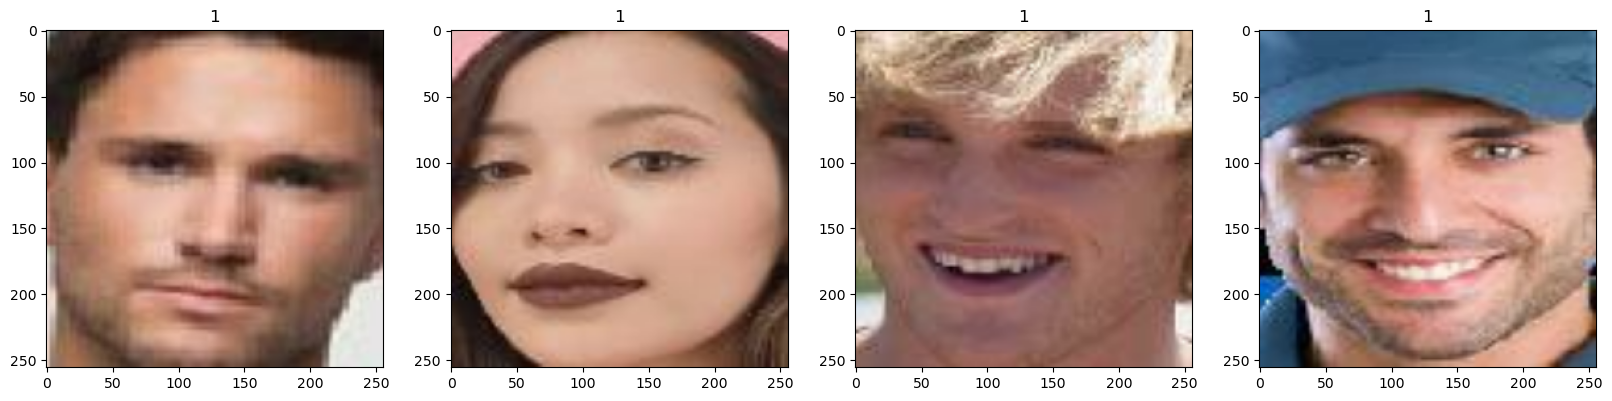

In [83]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Date de l'échelle



In [84]:
data = data.map(lambda x,y: (x/255, y))


In [85]:
data.as_numpy_iterator().next()


(array([[[[0.19607843, 0.13333334, 0.08235294],
          [0.19574142, 0.13299632, 0.08201593],
          [0.19420956, 0.13146447, 0.08048407],
          ...,
          [0.10998774, 0.07469363, 0.0786152 ],
          [0.11305147, 0.07775735, 0.08167892],
          [0.11372549, 0.07843138, 0.08235294]],
 
         [[0.19439338, 0.13164829, 0.08066789],
          [0.19431703, 0.13157193, 0.08059154],
          [0.19396996, 0.13122487, 0.08024447],
          ...,
          [0.10947433, 0.07418022, 0.07810178],
          [0.11240641, 0.07711229, 0.08103386],
          [0.11305147, 0.07775735, 0.08167892]],
 
         [[0.18673407, 0.12398897, 0.07300858],
          [0.18784252, 0.12509742, 0.07411703],
          [0.19288091, 0.1301358 , 0.07915542],
          ...,
          [0.10714064, 0.07184651, 0.07576808],
          [0.10947433, 0.07418022, 0.07810178],
          [0.10998774, 0.07469363, 0.0786152 ]],
 
         ...,
 
         [[0.75594366, 0.61476713, 0.5598652 ],
          [0.75242

# 5. Données fractionnées


In [86]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [87]:
train_size


25

In [88]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Deep Learning Model


In [89]:
train


<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [91]:
model = Sequential()


In [92]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [93]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [94]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

# 7. Training


In [95]:
logdir='logs'


In [96]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [97]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
25/25 [==============================] - 17s 546ms/step - loss: 0.4392 - accuracy: 0.9087 - val_loss: 0.1487 - val_accuracy: 0.9330
Epoch 2/20
25/25 [==============================] - 14s 529ms/step - loss: 0.0765 - accuracy: 0.9700 - val_loss: 0.0719 - val_accuracy: 0.9732
Epoch 3/20
25/25 [==============================] - 13s 498ms/step - loss: 0.0542 - accuracy: 0.9825 - val_loss: 0.0404 - val_accuracy: 0.9866
Epoch 4/20
25/25 [==============================] - 13s 523ms/step - loss: 0.0344 - accuracy: 0.9887 - val_loss: 0.0398 - val_accuracy: 0.9821
Epoch 5/20
25/25 [==============================] - 13s 523ms/step - loss: 0.0351 - accuracy: 0.9850 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 6/20
25/25 [==============================] - 13s 520ms/step - loss: 0.0269 - accuracy: 0.9937 - val_loss: 0.0181 - val_accuracy: 0.9955
Epoch 7/20
25/25 [==============================] - 14s 546ms/step - loss: 0.0132 - accuracy: 0.9962 - val_loss: 0.0376 - val_accuracy: 0.9911

# 8. Plot Performance


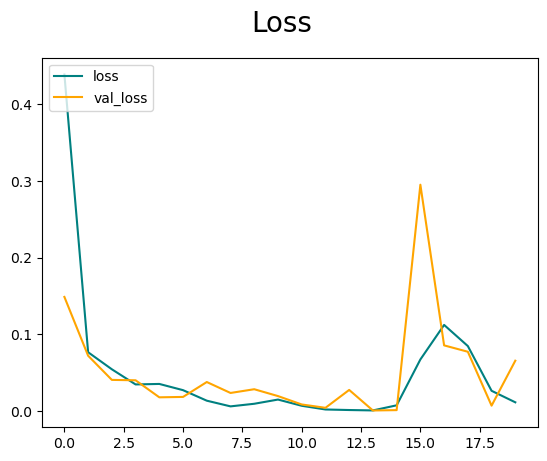

In [98]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

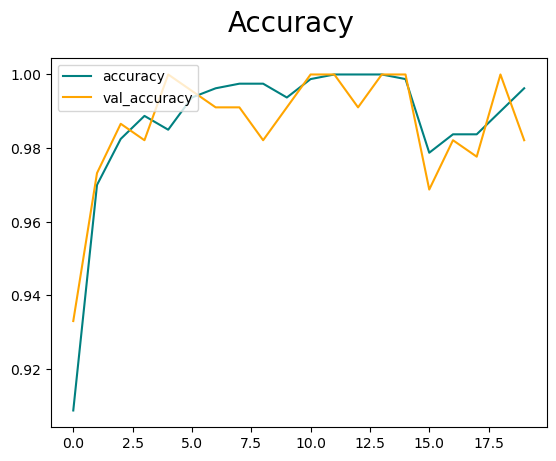

In [99]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluation du model


In [100]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [101]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [102]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 128ms/step


In [103]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9647059, shape=(), dtype=float32) tf.Tensor(0.96875, shape=(), dtype=float32)


# 10. Test


In [104]:
import cv2


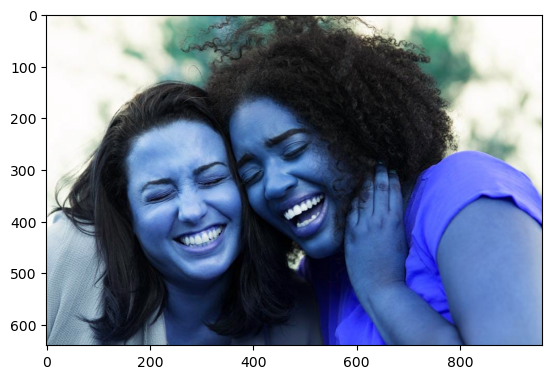

In [105]:
img = cv2.imread("D:\DeepLearning\Data\Happy\960x0.jpg")
plt.imshow(img)
plt.show()

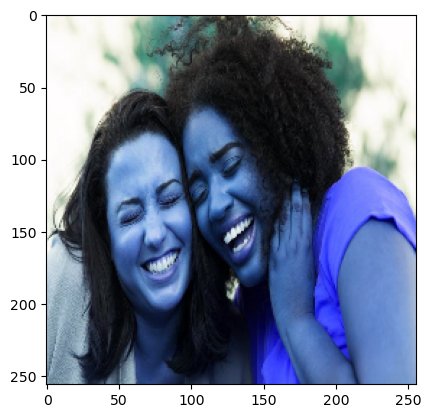

In [106]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [107]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 193ms/step


In [108]:
yhat


array([[6.20206e-32]], dtype=float32)

In [109]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model


In [110]:
from tensorflow.keras.models import load_model


In [111]:
model.save(os.path.join('models','imageclassifier.k3'))


INFO:tensorflow:Assets written to: models\imageclassifier.k3\assets


INFO:tensorflow:Assets written to: models\imageclassifier.k3\assets


In [112]:
new_model = load_model('models/imageclassifier.k3')



In [113]:
new_model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 183ms/step


array([[6.20206e-32]], dtype=float32)